<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
<table> <tr>

<table width="100%"><td style="background-color:#ffffff;font-size:14px;font-style:italic;text-align:right;">Prepared by <a href="http://cqtech.org" target="_blank"><b>CQTech</b></a>.</td></table>
    
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

# Two Qubit Topological Quantum Gates

<hr>

We have seen that braiding Fibonacci anyons enables us to approximate any single-qubit quantum gate. Let's now see how to approximate two-qubit quantum gates using purely topological braiding operations.

**Remark**: In this module, we shall focus on constructing Controlled-Unitary gates using the injection method as introduced in the paper by [Bonesteel et. al.](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.95.140503)

## Content

1. [Injection Method](#100)
    1. [Approximating the Identity Gate](#110)
    1. [Injection Trick](#120)
    1. [Implementation of the Injection Method](#130)
    1. [Explanation](#140)
1. [CNOT Gate](#200)
    1. [CNOT Braiding Sequence](#210)
    1. [The Unitary Matrix Representation of CNOT by Injection Method](#220)

<a id="100"></a> 
## 1. Injection Method 

Our starting point is to approximate the Identity operation as a singl-qubit quantum gate. This a necessary step to understand the injection method.

<a id="110"></a>
### 1.1 Approximating the Identity Gate


We claim that the following weave approximates the identity matrix up to a global phase such that the woven strand (the moved anyon) starts from the 3'rd rank, and ends up in the 1'st rank:
$$I = \left(\begin{array}{cc} 1 & 0\\ 0 & 1 \end{array}\right)\approx \sigma_1^{3}\sigma_2^{-2}\sigma_1^{2}\sigma_2^{2}\sigma_1^{-2}\sigma_2^{2}\sigma_1^{4}\sigma_2^{-2}\sigma_1^{-4} \sigma_2^{-4} \sigma_1^{-2} \sigma_2^{-2} \sigma_1^{2} \sigma_2^{4}\sigma_1^{2}\sigma_2^{-4}\sigma_1^{-2}\sigma_2^3$$

In [1]:
# identity braiding sequence
id_seq = [[2, 3], [1, -2], [2, -4], [1, 2], [2, 4], [1, 2], [2, -2], [1, -2], [2, -4],
          [1, -4], [2, -2], [1, 4], [2, 2], [1, -2], [2, 2], [1, 2], [2, -2], [1, 3]]

<a id="task1"></a>
##### Task 1

Draw the previous weaving sequence.

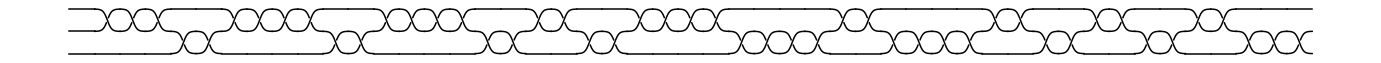

In [2]:
from tqsim import AnyonicCircuit

### Your Code
circuit = AnyonicCircuit()
circuit.braid_sequence(id_seq)
circuit.draw()

[click for our solution](C01_Two_Qubit_Topological_Gates_Solutions.ipynb#task1)

<a id="task2"></a>
##### Task 2

Verify that the given weaving sequence approximates the identity matrix.<br>
Use the *to_unitary* function, and the identity matrix given in the cell bellow.

In [8]:
import numpy as np

# sigma_1
sigma_1 = np.array([[np.exp(-4 * 1j * np.pi / 5), 0],
                    [0, np.exp(3 * 1j * np.pi / 5)]])
# sigma_1 ^ -1
sigma_1_inv = sigma_1.T.conjugate()

# sigma_2
PHI = (1 + np.sqrt(5)) / 2
F = np.array([[1 / PHI, 1 / np.sqrt(PHI)],
              [1 / np.sqrt(PHI), -1 / PHI]])
R = sigma_1
sigma_2 = F @ R @ F

# sigma_2 ^ -1
sigma_2_inv = sigma_2.T.conjugate()

# Identity
I = np.array([[1, 0],
              [0, 1]])

In [9]:
def distance(w, u):
    """
    This function calculates the spectral distance between two unitaries w and u 
    up to a global phase.
    """
    global_phase_w = pow(np.cfloat(np.linalg.det(w)), 1/w.shape[0])
    global_phase_u = pow(np.cfloat(np.linalg.det(u)), 1/u.shape[0])

    diff = np.matrix(w / global_phase_w - u / global_phase_u)

    return abs((max(np.linalg.eig(diff.getH() @ diff)[0]))**(1/2))


In [10]:
def to_unitary(braiding_sequence, target):
    """
    This function claculates the unitary matrix representation of the braiding_sequence 
    and measures its distance to the target unitary.
    """
    I = np.array([[1, 0],
                  [0, 1]])

    sigma = {1 : {1 : sigma_1, -1 : sigma_1_inv},
             2 : {1 : sigma_2, -1 : sigma_2_inv}}

    L = 0
    unitary = I
    for weave in braiding_sequence:
        for ii in range(abs(weave[1])):
            L += 1
            if weave[1] > 0:
                unitary = sigma[weave[0]][1] @ unitary
            else:
                unitary = sigma[weave[0]][-1] @ unitary

    print(f'Length = {L}\n')
    print(f'Target = \n\n{target}')
    print(f'\nBraiding Sequence Unitary = \n\n{unitary}')
    print(f'\nd(Target, Braiding Sequence) = {distance(unitary, target)}')

In [11]:
### Your Code

[click for our solution](C01_Two_Qubit_Topological_Gates_Solutions.ipynb#task2)

<a id="120"></a>
### 1.2 Injection Trick

Suppose that the previous identity weaving sequence is applied on 4 anyons in such a way that the 4th anyon is woven around the 2nd and the 3rd strands to end up in the 2nd rank, as shown in the demonstration bellow.

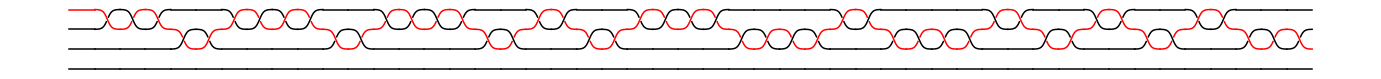

In [12]:
# Add one rank to the weaving sequence
from copy import deepcopy

id_seq_4 = deepcopy(id_seq)
for ii, weave in enumerate(id_seq_4):
    id_seq_4[ii][0] += 1
    
# Draw the weaving sequence
id_circuit_4 = AnyonicCircuit(nb_qudits=1, nb_anyons_per_qudit=4)
id_circuit_4.braid_sequence(id_seq_4)

id_circuit_4.drawer.anyons[4].color = "red"
id_circuit_4.draw()

Since this weaving sequence is approximately equivalent to identity, it is also equivalent to doing nothing but **injecting** the 4th anyon between the 1st and the 2nd anyon! 

Check carefully the red strand in the above weaving sequence diagram.

<a id="130"></a>
### 1.3 Implementation of the Injection Method

All the steps of the implementation will be described bellow. A full explanation will be provided after that.

#### Injection Method Steps

1. Implement the Injection's weaving sequence $I$ on 4 anyons as mentioned above.
1. After the injection, we apply a given operation on the three bottom anyons, e.g. $\sigma_1^2$, by weaving only the injected anyon. 
1. Finally, apply the inverse sequence of $I$, which is $I^\dagger$, to turn the injected anyon back to its original place.

In conclusion, we apply the following weaving sequence: 

$$I \cdot \sigma_1^2 \cdot I^\dagger \approx \mathbf{\sigma_1^{3}\sigma_2^{-2}\sigma_1^{2}\sigma_2^{2}\sigma_1^{-2}\sigma_2^{2}\sigma_1^{4}\sigma_2^{-2}\sigma_1^{-4} \sigma_2^{-4} \sigma_1^{-2} \sigma_2^{-2} \sigma_1^{2} \sigma_2^{4}\sigma_1^{2}\sigma_2^{-4}\sigma_1^{-2}\sigma_2^3 }
\cdot \sigma_1^2 \cdot 
\mathbf{\sigma_2^3 \sigma_1^{-2}\sigma_2^{-4}\sigma_1^{2}\sigma_2^{4}\sigma_1^{2} \sigma_2^{-2}\sigma_1^{-2}\sigma_2^{-4}\sigma_1^{-4}\sigma_2^{-2}\sigma_1^{4}\sigma_2^{2}\sigma_1^{-2}\sigma_2^{2}\sigma_1^{2}\sigma_2^{-2}\sigma_1^{3}}$$

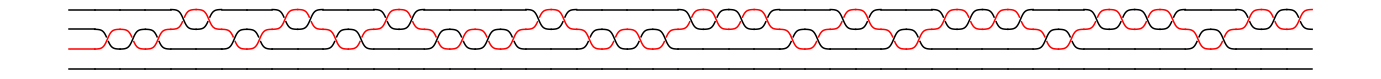

In [13]:
# Calculate the weaving sequence of the inverse of I
id_seq_4_inv = deepcopy(id_seq_4)

## 1. invert the power signs of all sigmas
for ii, weave in enumerate(id_seq_4_inv):
    id_seq_4_inv[ii][1] = -id_seq_4_inv[ii][1]
    
## 2. invert the order of sigmas
id_seq_4_inv = id_seq_4_inv[::-1]

# Draw the weaving sequence
id_circuit_4_inv = AnyonicCircuit(nb_qudits=1, nb_anyons_per_qudit=4)
id_circuit_4_inv.braid_sequence(id_seq_4_inv)

id_circuit_4_inv.drawer.anyons[2].color = "red"
id_circuit_4_inv.draw()

<a id="140"></a>
### 1.4 Explanation

1. If the injected anyon was just the vacuum, then the total weaving sequence is trivial, therefor the state of the three lower anyons will not be affected by weaving the vacuum around them.
2. If the injected anyon was a non-trivial Fibonacci anyon, then this weaving sequence will operate on the state of the lower three anyons by applying $\sigma_1^2$.

This is exactly what a quantum scientist expects from a Controlled-$U$ gate ($CU$). By defintion, a $CU$ gate applies $U$ on the target qubit only if the controlling qubit is in a given state. So, in the previous protocol, we have effictively controlled a qubit made of three Fibonacci anyons using one controlling anyon!

<img src="../images/cu_1.png" width="35%" align="center">

However, we can do more than that since we can weave two anyons together instead of one anyon. The two anyons should be the first two anyons of the controlling qubit. Remember that when the controlling qubit is the state $\ket{0}$, then its two first anyons are fused to the vacuum, while they are fused to $1$ if the state of the controlling qubit is $\ket{1}$. 

<img src="../images/cu_2.png" width="35%" align="center">

Bingo! We got a controlled two-qubit gate!

<img src="../images/cu.png" width="35%" align="center">

Notice that the braiding sequence will double in length since each weave should be converted to two consecutive braids. For instance $\sigma_3 \Rightarrow \sigma_4 \sigma_3$ if the woven strand is the 3rd one.

We now implement a function that transforms a weaving sequence into a braiding sequence by replacing the woven strand by a doubled strand.

In [14]:
import numpy as np
from copy import deepcopy

def to_doubled_strand(weaving_seq, initial_strand):
    """
    This function transforms a weaving sequence into a braiding sequence by replacing
    the woven strand with doubled strand (two adjacent strands).
    
    Inputs:
        weaving_seq : weaving sequence
        initial_strand : is the label of the woven strand eg. 1, 2, 3
    """
    braids = []
    woven_strand = deepcopy(initial_strand)
    for weave in weaving_seq:
        power = weave[1]
        index = weave[0]
        power_sign = int(np.sign(power))
        for ii in range(abs(power)):
            if woven_strand == index:
                braids.append([index + 1, power_sign])
                braids.append([index, power_sign])
                woven_strand += 1
            else:
                braids.append([index, power_sign])
                braids.append([index + 1, power_sign])
                woven_strand += -1
    
    return braids

Let us transform the weaving sequence of $U = \sigma_1^2$ of 3 anyons into a braiding sequence of 4 anyons, where the previous second strand is replaced by doubled strand.

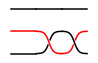

In [15]:
# Draw U in 3 anyons
u_seq = [[1, 2]]
u_circuit = AnyonicCircuit(nb_anyons_per_qudit=3)
u_circuit.braid_sequence(u_seq)

u_circuit.drawer.anyons[2].color = "red"
u_circuit.draw()

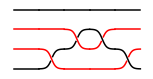

In [16]:
# Transform U to 4 anyons by doubling the second strand
u_seq_4 = to_doubled_strand(u_seq, initial_strand=2)

u_circuit_4 = AnyonicCircuit(nb_anyons_per_qudit=4)
u_circuit_4.braid_sequence(u_seq_4)

u_circuit_4.drawer.anyons[2].color = "red"
u_circuit_4.drawer.anyons[3].color = "red"
u_circuit_4.draw()

<a id="200"></a>
## 2. CNOT Gate

We are now in position to construct a $CNOT$ gate. It is sufficient to follow the injection method and replace $U$ by the $X$ gate. Using a single-qubit braiding gate approximating algorithm, it is possible to find an approximation of $X$ gate such that the woven strand starts from the second position and returns back to the same position. We claim that the following weaving sequence is the best approximation of $X$ (up to a global phase $i$) having a length $L = 44$, and verifying the edge conditions.

$$i\text{X} = i\left( \begin{array}{cc} 0 & 1\\ 1 & 0 \end{array}\right)
\approx \sigma_1^{-2}\sigma_2^{-2}\sigma_1^2\sigma_2^{-2}\sigma_1^{2}\sigma_2^{-4}\sigma_1^{2}\sigma_2^{4}\sigma_1^{-2}\sigma_2^4\sigma_1^{-2}\sigma_2^2\sigma_1^{2}\sigma_2^{-2}\sigma_1^{4}\sigma_2^{-4}\sigma_1^{-2} $$

In [17]:
# Weaving sequence
x_seq = [[1, -2], [2, -4], [1, 4], [2, -2], [1, 2], [2, 2], [1, -2], [2, 4], [1, -2], [2, 4],
         [1, 2], [2, -4], [1, 2], [2, -2], [1, 2], [2, -2], [1, -2]]


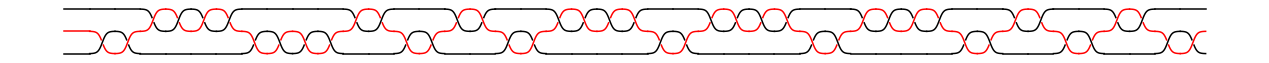

In [18]:
# Draw thw weaving sequence of X
x_circuit = AnyonicCircuit()
x_circuit.braid_sequence(x_seq)

x_circuit.drawer.anyons[2].color = "red"
x_circuit.draw()

Let's verify that this weaving sequence is a good approximation of the $X$ gate, up to a global phase $i$.

In [19]:
iX = 1j * np.array([[0, 1],
                    [1, 0]])
to_unitary(x_seq, iX)

Length = 44

Target = 

[[0.+0.j 0.+1.j]
 [0.+1.j 0.+0.j]]

Braiding Sequence Unitary = 

[[ 0.00063582-1.55426788e-04j -0.00055037+9.99999634e-01j]
 [ 0.00055037+9.99999634e-01j  0.00063582+1.55426788e-04j]]

d(Target, Braiding Sequence) = 0.00085517993615548


<a id="210"></a>
### 2.1. CNOT Braiding Sequence

We should now concatenate the 3 braiding sequences $I$, $iX$, and $I^{-1}$ to construct a $CNOT$.<br>
In the following, we will drop the global phase $i$, and just refer to $iX$ as $X$, for convenience.

First of all, we need to transfom the weaving sequences of $I$ and $X$ into doubled strand waving sequences and increment the indices of $I$ by $+1$, as shown in the figure bellow.

<img src="../images/cu.png" width="35%" align="center">

We transform the weaving sequence of $I$ in order to obtain the doubled weaving sequence as shown in the figure above and increment the indices of braiding operations by $+1$.

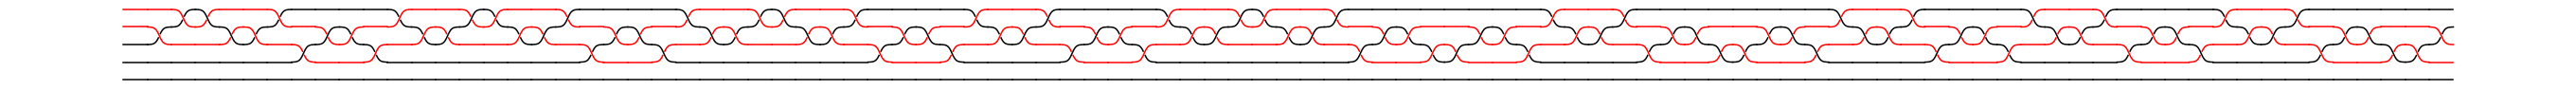

In [20]:
# transform the weaving sequence to a doubled weaving sequence
id_seq_doubled = to_doubled_strand(weaving_seq=id_seq, initial_strand=3)

# Increment the indices of braiding opeations by +1
for ii, braid_ in enumerate(id_seq_doubled):
    id_seq_doubled[ii][0] += 1
    
id_circuit_doubled = AnyonicCircuit(nb_anyons_per_qudit=5)
id_circuit_doubled.braid_sequence(id_seq_doubled)

id_circuit_doubled.drawer.anyons[4].color = "red"
id_circuit_doubled.drawer.anyons[5].color = "red"
id_circuit_doubled.draw()

We now compute the inverse of the injection ($I^{-1}$) by reflecting the braiding sequence and flipping the sign of braiding powers.

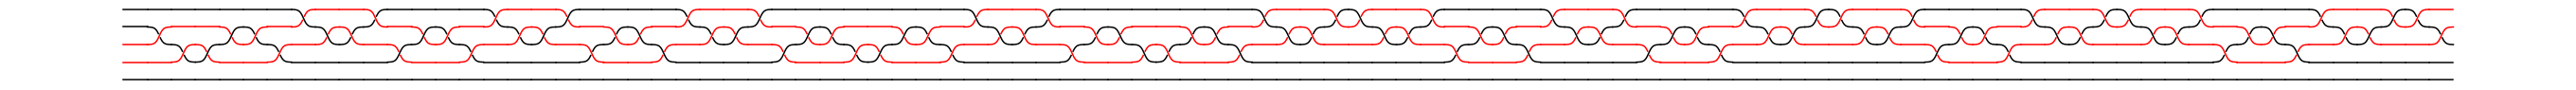

In [21]:
id_seq_doubled_inv = deepcopy(id_seq_doubled)
id_seq_doubled_inv = id_seq_doubled_inv[::-1]

for ii, braid_ in enumerate(id_seq_doubled_inv):
    id_seq_doubled_inv[ii][1] = -id_seq_doubled_inv[ii][1]

id_circuit_doubled_inv = AnyonicCircuit(nb_anyons_per_qudit=5)
id_circuit_doubled_inv.braid_sequence(id_seq_doubled_inv)

id_circuit_doubled_inv.drawer.anyons[2].color = "red"
id_circuit_doubled_inv.drawer.anyons[3].color = "red"
id_circuit_doubled_inv.draw()

We then transform the weaving sequence of the $X$ gate to obtain a doubled strand weaving sequence without incrementing the indices of the braiding operations.

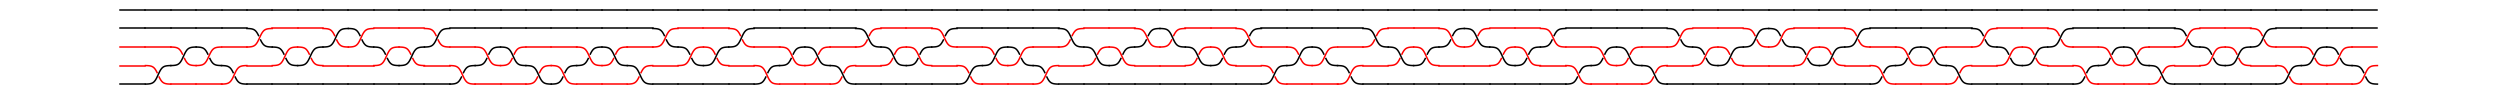

In [22]:
x_seq_doubled = to_doubled_strand(weaving_seq=x_seq, initial_strand=2)
x_circuit_doubled = AnyonicCircuit(nb_anyons_per_qudit=5)
x_circuit_doubled.braid_sequence(x_seq_doubled)

x_circuit_doubled.drawer.anyons[2].color = "red"
x_circuit_doubled.drawer.anyons[3].color = "red"
x_circuit_doubled.draw()

<a id="220"></a>
### 2.2. The Unitary Matrix Representation of CNOT by Injection Method

At this point, we are in position to concatenate the three parts.

In [23]:
cnot_seq = id_seq_doubled + x_seq_doubled + id_seq_doubled_inv

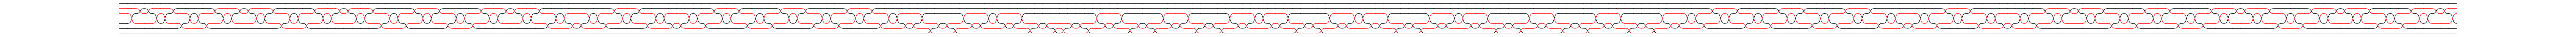

In [27]:
cnot_circuit = AnyonicCircuit(nb_qudits=2, nb_anyons_per_qudit=3)
cnot_circuit.braid_sequence(cnot_seq)

cnot_circuit.drawer.anyons[4].color = "red"
cnot_circuit.drawer.anyons[5].color = "red"
cnot_circuit.draw()

<div class="alert alert-block alert-success">
<b>Tip: </b> You may want to open the braid's image in a separate tab (by right-clicking the image) in order to see the braid properly.
</div>

Now we can calculate the unitary representation of our braiding sequence.

An immediate issue we have is that $\sigma_1$ and $\sigma_2$ are not enough for this task, since they only act on the fusion space of 3 anyons, with overall anyonic charge of $1$, and whose dimension is $2$.

In the case of $6$ anyons, we need $5$ braiding operations $\sigma_i$, for $i=1,2,3,4,5$. And the fusion space of anyons will have $13$ dimensions. This can be obtained from the Fibonacci sequence at $n=6$ : $F_6= 13$.

We can easily generate all the braiding operators using the tqsim package.

Sigma_1


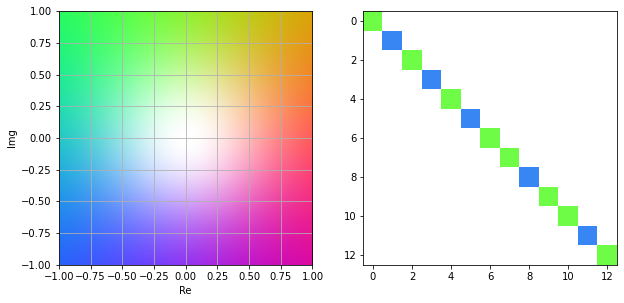

Sigma_2


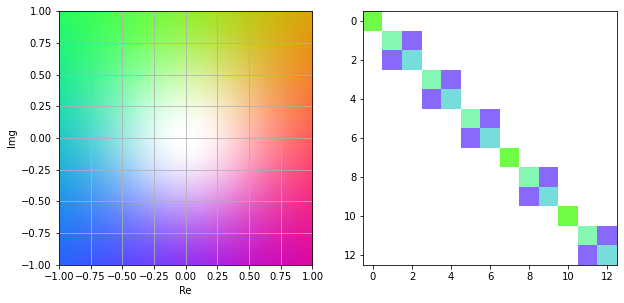

Sigma_3


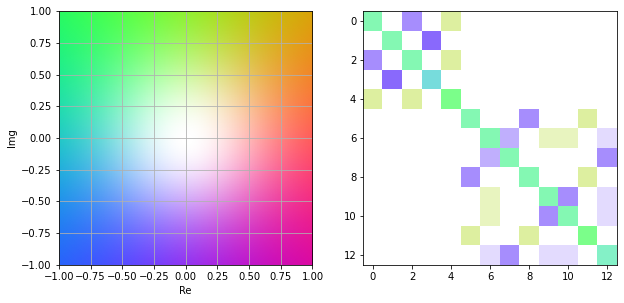

Sigma_4


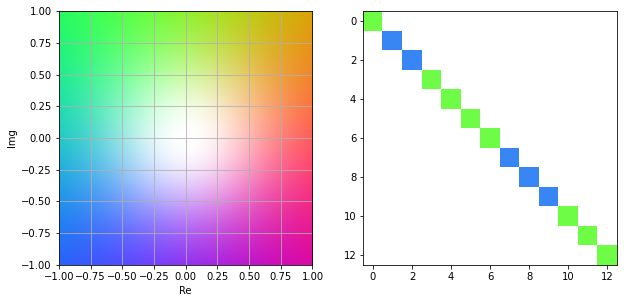

Sigma_5


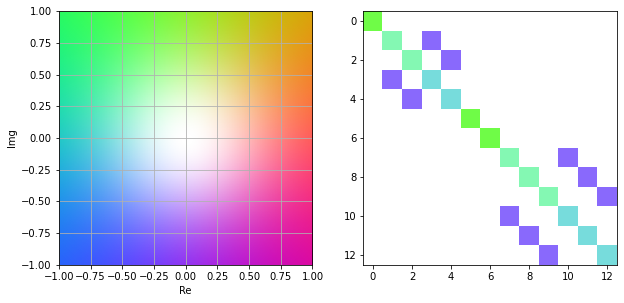

In [28]:
# Braiding operations of 6 anyons
from tqsim import generate_braiding_operator
from tqsim import cplot

braiding_ops = []
for ii in range(5):
    print(f'Sigma_{ii+1}')
    braiding_op = generate_braiding_operator(index=ii+1, nb_qudits=2, nb_anyons_per_qudit=3)
    cplot(braiding_op)
    braiding_ops.append(np.array(braiding_op))


The basis of fusion state of $6$ anyons is given as follows:

        1 1 1 1 1 1 
        \/  / \/  / 
        i\ /  k\ / 
          \     /     
          j\  l/     
            \ /     
            m\    
            
We can also generate all the fusion states using the same package.<br>
Each one of these states is represented by Python dict :

        {'qudits': [[i, j], [k, l], 'roots': [m]}


In [29]:
from tqsim import generate_basis
basis = generate_basis(nb_qudits=2, nb_anyons_per_qudit=3)
basis

[{'qudits': [[1, 0], [1, 0]], 'roots': [0]},
 {'qudits': [[0, 1], [0, 1]], 'roots': [0]},
 {'qudits': [[1, 1], [0, 1]], 'roots': [0]},
 {'qudits': [[0, 1], [1, 1]], 'roots': [0]},
 {'qudits': [[1, 1], [1, 1]], 'roots': [0]},
 {'qudits': [[0, 1], [1, 0]], 'roots': [1]},
 {'qudits': [[1, 1], [1, 0]], 'roots': [1]},
 {'qudits': [[1, 0], [0, 1]], 'roots': [1]},
 {'qudits': [[0, 1], [0, 1]], 'roots': [1]},
 {'qudits': [[1, 1], [0, 1]], 'roots': [1]},
 {'qudits': [[1, 0], [1, 1]], 'roots': [1]},
 {'qudits': [[0, 1], [1, 1]], 'roots': [1]},
 {'qudits': [[1, 1], [1, 1]], 'roots': [1]}]

The **computational states** are the states which verify the following conditions:
$j=1$, $l=1$ and $m=0$.

We can see from the result above that only 4 states verify such conditions.

In [30]:
computational_basis = [1, 2, 3, 4]

print('The computational basis is:\n')
for ii in computational_basis:
    print(basis[ii])

The computational basis is:

{'qudits': [[0, 1], [0, 1]], 'roots': [0]}
{'qudits': [[1, 1], [0, 1]], 'roots': [0]}
{'qudits': [[0, 1], [1, 1]], 'roots': [0]}
{'qudits': [[1, 1], [1, 1]], 'roots': [0]}


<a id="task3"></a>
#### Task 3

Compute the unitary representation of the braiding sequence of $CNOT$, using the braiding operators that we have generated above.

In [62]:
# Compute the unitary

### Your Code


In [63]:
# plot the matrix
from tqsim import cplot
cplot(unitary, sigma=0.00003)

NameError: name 'unitary' is not defined

[click for our solution](C01_Two_Qubit_Topological_Gates_Solutions.ipynb#task3)

<a id="task4"></a>
#### Task 4

Compute the $CNOT$ unitary in the computational basis.

In [ ]:
u = np.eye(4) * (1 + 0j)
for aa, ii in enumerate(computational_basis):
    for bb, jj in enumerate(computational_basis):
        u[aa][bb] = unitary[ii][jj]

cplot(u, sigma=0.00003)

[click for our solution](C01_Two_Qubit_Topological_Gates_Solutions.ipynb#task4)

<a id="task5"></a>
#### Task 5

Compute the distance between this obtained $CNOT$ and the exact $CNOT$ whose target gate is the $iX$ gate.

In [ ]:
### Your Code

[click for our solution](C01_Two_Qubit_Topological_Gates_Solutions.ipynb#task5)

Notice that Injection method gives the exact values when the controlling qubit is in the state $\ket{0}$. But when it is in the state $\ket{1}$, the target gate should be well approximated to avoid errors.